# Using `datasets`

In [14]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

from PyBMF.datasets import NetflixData, NetflixGenreCastData
from PyBMF.datasets import MovieLensData, MovieLensUserData, MovieLensGenreCastData, MovieLensGenreCastUserData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
overwrite_cache = True # enable this to (re-)generate pickles

# 1. Netflix data

1. Use `load()` method to load dataset.
2. Disable `overwrite_cache` will read pickle files generated before.
2. Netflix dataset has `size` being ['small', 'full']:
- 'small', size 15MB, users ~10k, items 4945, ratings ~608k
- 'full', size 2.43GB, users ~480k, items 17770, ratings ~100M

In [8]:
data_nf = NetflixData(size='small')
# data_nf = NetflixData(size='full') # full data takes ~90s to load

data_nf.load(overwrite_cache=overwrite_cache)

File exists at /Users/felixnie/.pybmf/data/netflix/data_small.csv
File exists at /Users/felixnie/.pybmf/data/netflix/movie_titles.csv


In [9]:
data_nf.X

<9992x4945 sparse matrix of type '<class 'numpy.int64'>'
	with 607803 stored elements in Compressed Sparse Row format>

In [10]:
# read netflix ratings

print(data_nf.X.shape)
print(data_nf.factor_info)

(9992, 4945)
[[array([   0,    1,    2, ..., 9989, 9990, 9991]), array([2567280, 1478381, 1045221, ..., 2577021, 1541139,  609169]), array(['2567280', '1478381', '1045221', ..., '2577021', '1541139',
       '609169'], dtype='<U21')], [array([   0,    1,    2, ..., 4942, 4943, 4944]), array([    2,     3,     9, ..., 17762, 17765, 17767]), array(['Isle of Man TT 2004 Review', 'Character',
       "Class of Nuke 'Em High 2", ..., 'Gattaca', "Godzilla's Revenge",
       'Fidel Castro: American Experience'], dtype='<U98')]]


# 2. Netflix data with genres and cast

Netflix dataset with genres and cast information fetched from IMDb.

In [8]:
data_nfgc = NetflixGenreCastData(size='full', source='imdb')
data_nfgc.load(overwrite_cache=overwrite_cache)

File exists at /Users/felixnie/.pybmf/data/netflix/data.csv
File exists at /Users/felixnie/.pybmf/data/netflix/movie_titles.csv
File exists at /Users/felixnie/.pybmf/data/netflix/netflix_all.csv


In [9]:
# read netflix ratings with genres and cast

print(data_nfgc.Xs)
print(data_nfgc.factor_info)

[<480189x17770 sparse matrix of type '<class 'numpy.int64'>'
	with 100480507 stored elements in Compressed Sparse Row format>, <28x17770 sparse matrix of type '<class 'numpy.float64'>'
	with 32864 stored elements in Compressed Sparse Row format>, <227737x17770 sparse matrix of type '<class 'numpy.float64'>'
	with 474188 stored elements in Compressed Sparse Row format>]
[[array([     0,      1,      2, ..., 480186, 480187, 480188]), array([1488844,  822109,  885013, ..., 2294145, 1892856, 1808649]), array(['1488844', '822109', '885013', ..., '2294145', '1892856',
       '1808649'], dtype='<U21')], [array([    0,     1,     2, ..., 17767, 17768, 17769]), array([    1,     2,     3, ..., 17768, 17769, 17770]), array(['Dinosaur Planet', 'Isle of Man TT 2004 Review', 'Character', ...,
       'Epoch', 'The Company', 'Alien Hunter'], dtype='<U108')], [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]), array([ 0,  1, 

# 3. MovieLens data

In [11]:
data_ml = MovieLensData(size='100k')
# data_ml = MovieLensData(size='1m')

data_ml.load(overwrite_cache=overwrite_cache)

Data from http://files.grouplens.org/datasets/movielens/ml-1m.zip
will be cached into /Users/felixnie/.pybmf/data/movielens/ml-1m/ratings.dat


5.93MB [00:05, 1.13MB/s]                            


Unzipping ...
File cached!
File exists at /Users/felixnie/.pybmf/data/movielens/ml-1m/movies.dat


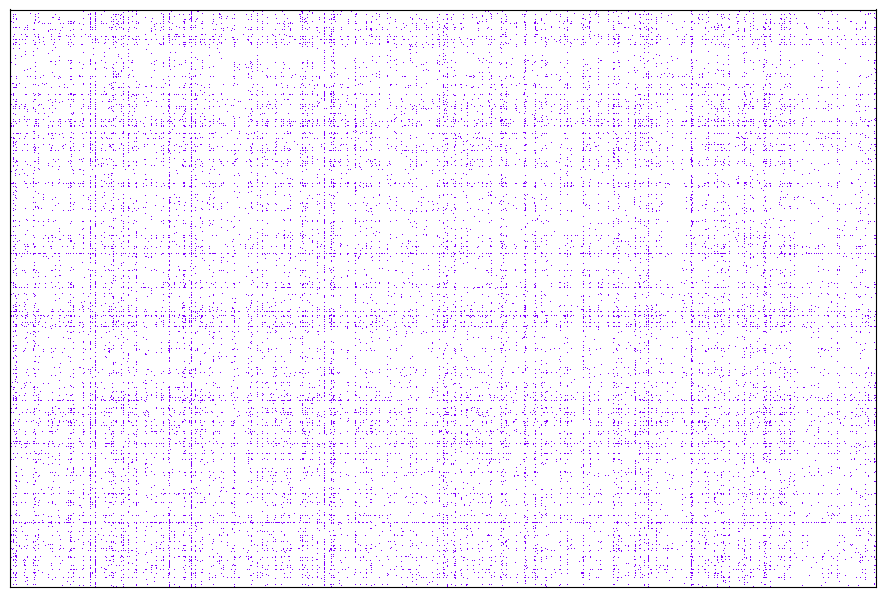

<Figure size 640x480 with 0 Axes>

In [12]:
data_ml.X

from PyBMF.utils import show_matrix
show_matrix([(data_ml.X[:1000, :1500], [0, 0], '')])

In [13]:
# read movielens ratings

print(data_ml.X.shape)
# print(data_ml.factor_info)

(6040, 3706)


# 4. MovieLens data with user

In [18]:
data_mlu = MovieLensUserData(size='100k')
data_mlu.load(overwrite_cache=overwrite_cache)

File exists at /Users/felixnie/.pybmf/data/movielens/ml-100k/u.data
File exists at /Users/felixnie/.pybmf/data/movielens/ml-100k/u.item
File exists at /Users/felixnie/.pybmf/data/movielens/ml-100k/u.user
File exists at /Users/felixnie/.pybmf/data/movielens/ml-100k/u.occupation


In [19]:
# read movielens ratings

print(data_mlu.Xs)
# print(data_mlu.factor_info)

[<943x1682 sparse matrix of type '<class 'numpy.int64'>'
	with 100000 stored elements in Compressed Sparse Row format>, <943x81 sparse matrix of type '<class 'numpy.float64'>'
	with 3499 stored elements in Compressed Sparse Row format>]


# 5. MovieLens data with genre and cast

In [25]:
data_mlgc = MovieLensGenreCastData(size='100k')
data_mlgc.load(overwrite_cache=overwrite_cache)

File exists at /Users/felixnie/.pybmf/data/movielens/ml-100k/u.data
File exists at /Users/felixnie/.pybmf/data/movielens/ml-100k/u.item
File exists at /Users/felixnie/.pybmf/data/movielens/ml_100k_imdb.csv


/Users/felixnie/miniconda3/envs/pybmf/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/felixnie/miniconda3/envs/pybmf/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [26]:
# read movielens ratings

print(data_mlgc.Xs)
# print(data_mlgc.factor_info)

[<943x1682 sparse matrix of type '<class 'numpy.int64'>'
	with 100000 stored elements in Compressed Sparse Row format>, <39x1682 sparse matrix of type '<class 'numpy.float64'>'
	with 25717 stored elements in Compressed Sparse Row format>, <0x1682 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>]


# 6. MovieLens data with user, genre and cast

In [29]:
data_mlgcu = MovieLensGenreCastUserData(size='100k')
data_mlgcu.load(overwrite_cache=overwrite_cache)

In [30]:
# read movielens ratings

print(data_mlgcu.Xs)
# print(data_mlgcu.factor_info)

[<943x1682 sparse matrix of type '<class 'numpy.int64'>'
	with 100000 stored elements in Compressed Sparse Row format>, <943x81 sparse matrix of type '<class 'numpy.float64'>'
	with 3499 stored elements in Compressed Sparse Row format>, <39x1682 sparse matrix of type '<class 'numpy.float64'>'
	with 25717 stored elements in Compressed Sparse Row format>, <0x1682 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>]
